In [4]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

(1874, 2700)


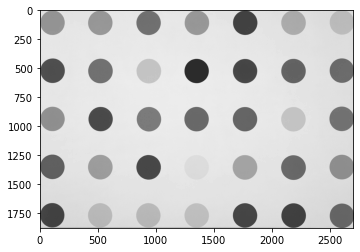

In [5]:
#p=input("enter path of cover image")
cover=cv2.imread('images/'+input(),0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(256, 256)


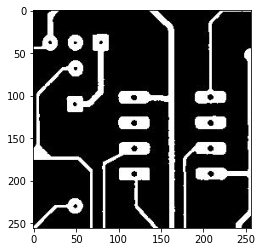

In [6]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()
#4.1.05.tiff

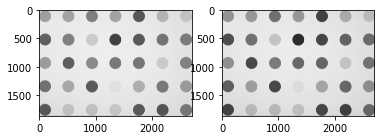

In [7]:
def maxc(i,j):
    if i>j:
        return i
    return j
def minc(i,j):
    if i<j:
        return i
    return j
def stego_pvd_encode(cover,msg):
    cover1d=cover.flatten()
    msg1d=msg.flatten()
    byt_str=''
    for i in range(msg1d.shape[0]):
        byt_str+=format(int(msg1d[i]),'08b')
    mtb=0
    n=len(byt_str)
    i=0
    while mtb<n:
        if cover1d[i]>cover1d[i+1]:
            diff=cover1d[i]-cover1d[i+1]
        else:
            diff=cover1d[i+1]-cover1d[i]
        #print('co',cover1d[i],cover1d[i+1],diff)
        if diff>=0 and diff<8:
            bits=2
            low=0
        elif diff>=8 and diff<16:
            bits=3
            low=8
        elif diff>=16 and diff<32:
            bits=4
            low=16
        elif diff>=32 and diff<64:
            bits=5
            low=32
        elif diff>=64 and diff<128:
            bits=6
            low=64
        elif diff>=128 and diff<256:
            bits=7
            low=128
        ac_diff=(int(byt_str[mtb:mtb+bits],2)+low)-diff
        mtb+=bits
        half=ac_diff//2
        mx=maxc(cover1d[i],cover1d[i+1])
        mn=minc(cover1d[i],cover1d[i+1])
        if mx+half<=255:
            mx+=half
        else:
            half=255-mx
            mx=255
        if mn-(ac_diff-half)>=0:
            mn-=(ac_diff-half)
        else:
            mx+=(half-mn)
            mn=0
        if cover1d[i]>cover1d[i+1]:
            cover1d[i]=mx
            cover1d[i+1]=mn
        else:
            cover1d[i+1]=mx
            cover1d[i]=mn
        i+=2
    return cover1d.reshape(cover.shape[0],cover.shape[1])

cover_stego_pvd=stego_pvd_encode(cover,msg)
plt.subplot(1,2,1)
plt.imshow(cover_stego_pvd,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cover,cmap='gray')
plt.show()


In [8]:
from skimage import metrics
print('MSE =',metrics.mean_squared_error(cover,cover_stego_pvd))
print('PSNR =',metrics.peak_signal_noise_ratio(cover,cover_stego_pvd))
print('SSIM =',metrics.structural_similarity(cover,cover_stego_pvd))

MSE = 0.24678979406300644
PSNR = 54.20753165286965
SSIM = 0.998318299252396


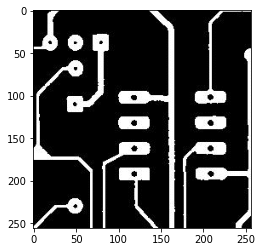

In [9]:
def stego_pvd_decode(stego,dim):
    stego1d=stego.flatten()
    n=dim[0]*dim[1]*8
    mtb=0
    i=0
    byt_str=''
    while mtb<n:
        if stego1d[i]>stego1d[i+1]:
            diff=stego1d[i]-stego1d[i+1]
        else:
            diff=stego1d[i+1]-stego1d[i]
        i+=2
        if diff>=0 and diff<8:
            bits=2
            low=0
        elif diff>=8 and diff<16:
            bits=3
            low=8
        elif diff>=16 and diff<32:
            bits=4
            low=16
        elif diff>=32 and diff<64:
            bits=5
            low=32
        elif diff>=64 and diff<128:
            bits=6
            low=64
        elif diff>=128 and diff<256:
            bits=7
            low=128
        val=diff-low
        byt_str+=format(int(val),'0'+str(bits)+'b')
        mtb+=bits
    mtb=0
    msg_rec=[]
    while mtb<n:
        msg_rec.append(int(byt_str[mtb:mtb+8],2))
        mtb+=8
    return np.array(msg_rec).reshape(dim[0],dim[1])
msg_rec_pvd=stego_pvd_decode(cover_stego_pvd,msg.shape)
plt.imshow(msg_rec_pvd,cmap='gray')
plt.show()

In [12]:

def stegoPerformance(msg_files,cover_files):
    mse_l=[]
    psnr_l=[]
    ssim_l=[]   
    for i in msg_files:
        mse_l.append([])
        psnr_l.append([])
        ssim_l.append([])
        for j in cover_files:
            a=cv2.imread('images/'+j,0)
            b=cv2.imread('images/'+i,0)
            x=stego_pvd_encode(a,b)
            y=stego_pvd_decode(x,b.shape)
            print('-------------------------------------------------')
            print('COVER IMAGE:                     MESSAGE IMAGE')
            plt.subplot(1,2,1)
            plt.imshow(a,cmap='gray')
            plt.subplot(1,2,2)
            plt.imshow(b,cmap='gray')
            plt.show()
            m=metrics.mean_squared_error(a,x)
            p=metrics.peak_signal_noise_ratio(a,x)
            s=metrics.structural_similarity(a,x)
            mse_l[len(mse_l)-1].append(m)
            psnr_l[len(mse_l)-1].append(p)
            ssim_l[len(mse_l)-1].append(s)
            print("MSE: ",m)
            print("PSNR: ",p)
            print("SSIM: ",s)
            print('-----------------------------------------------------')
    return mse_l,psnr_l,ssim_l
def compPlot(msg_files,cover_files,x,xlbl='',ylbl=''):
    m=len(msg_files)
    n=len(cover_files)
    plt.figure(figsize=(10,10))
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    for i in range(m):
        for j in range(n):
            plt.plot(range(0,n),x[i])
    plt.legend([x for x in msg_files],loc=1)
    plt.show()


-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


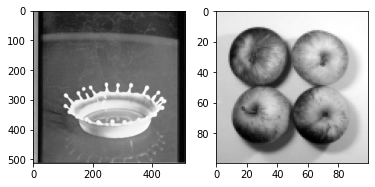

MSE:  0.7343597412109375
PSNR:  49.471715007482324
SSIM:  0.9954271925025571
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


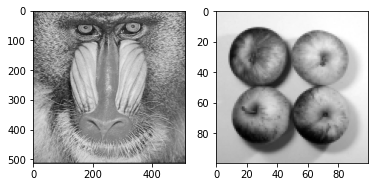

MSE:  5.242580413818359
PSNR:  40.93535260212218
SSIM:  0.9978960138776928
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


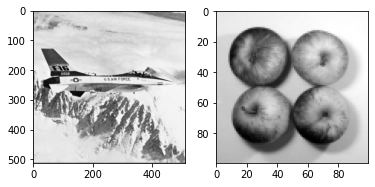

MSE:  0.7340927124023438
PSNR:  49.473294481697835
SSIM:  0.9958465242293411
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


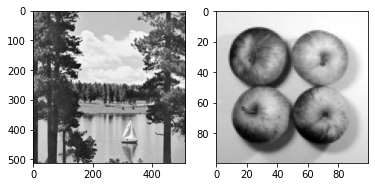

MSE:  2.0557022094726562
PSNR:  45.00120158205016
SSIM:  0.9964173250299655
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


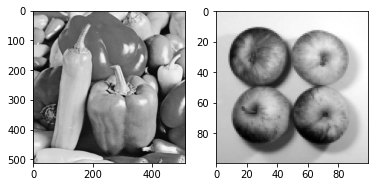

MSE:  1.4937896728515625
PSNR:  46.38790908201328
SSIM:  0.9953368315106595
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


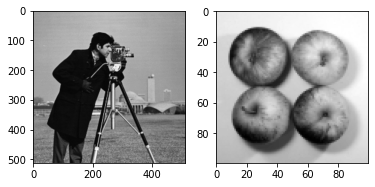

MSE:  0.6361770629882812
PSNR:  50.0950235406135
SSIM:  0.9967215229168882
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


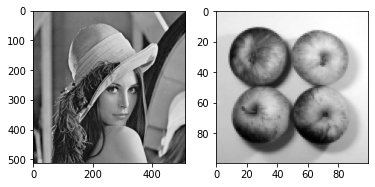

MSE:  0.7440223693847656
PSNR:  49.41494367856542
SSIM:  0.9953527552681163
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


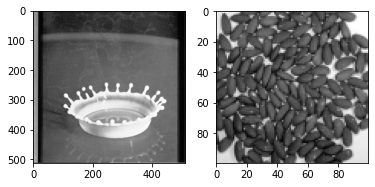

MSE:  0.7352447509765625
PSNR:  49.46648428171702
SSIM:  0.9953797397269765
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


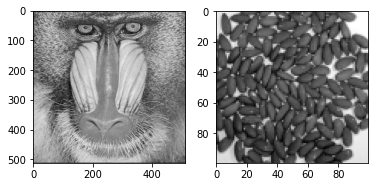

MSE:  4.1876983642578125
PSNR:  41.91104968533531
SSIM:  0.9982178745848443
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


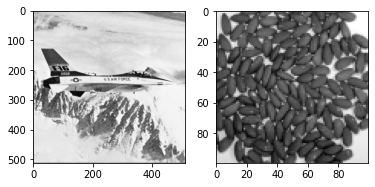

MSE:  0.6948204040527344
PSNR:  49.71207797440865
SSIM:  0.9957369279256575
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


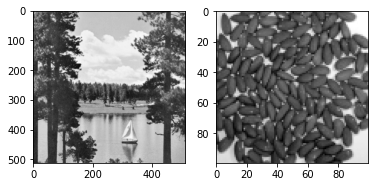

MSE:  1.6054611206054688
PSNR:  46.074805681319766
SSIM:  0.9964503599176119
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


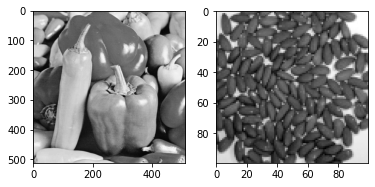

MSE:  1.3167381286621094
PSNR:  46.935809492967394
SSIM:  0.9953235205197849
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


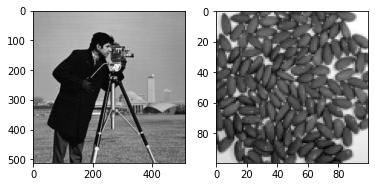

MSE:  0.5657196044921875
PSNR:  50.604791317911896
SSIM:  0.9969972069253769
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


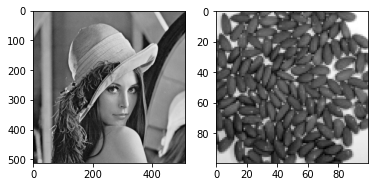

MSE:  0.7208175659179688
PSNR:  49.55254999256105
SSIM:  0.9952624549669526
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


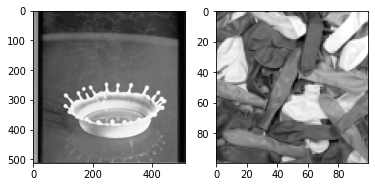

MSE:  0.744232177734375
PSNR:  49.41371917554915
SSIM:  0.9954296714341653
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


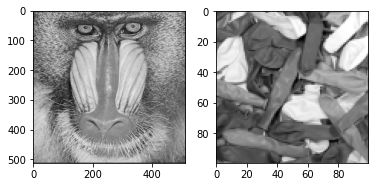

MSE:  4.524906158447266
PSNR:  41.5747078402086
SSIM:  0.9980759466559961
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


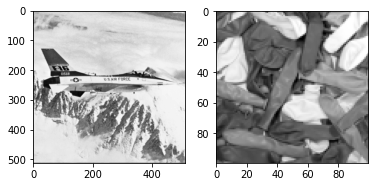

MSE:  0.737579345703125
PSNR:  49.45271614119453
SSIM:  0.9957970606628072
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


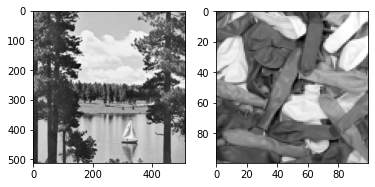

MSE:  1.8081474304199219
PSNR:  45.5584652233507
SSIM:  0.996455511294913
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


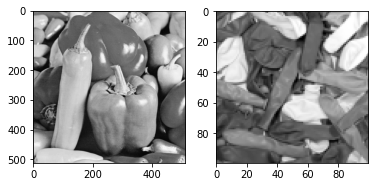

MSE:  1.3729019165039062
PSNR:  46.75440849590882
SSIM:  0.99536557645102
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


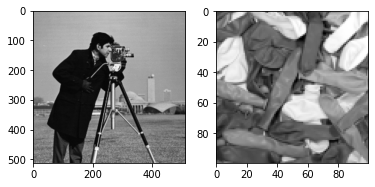

MSE:  0.5923881530761719
PSNR:  50.40473996206269
SSIM:  0.9969401944924001
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


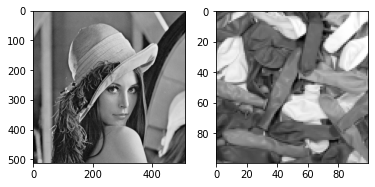

MSE:  0.7359619140625
PSNR:  49.46225020634313
SSIM:  0.9952573463441108
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


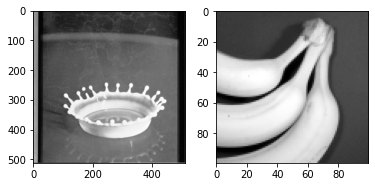

MSE:  0.7209243774414062
PSNR:  49.55190649799489
SSIM:  0.9954037074423494
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


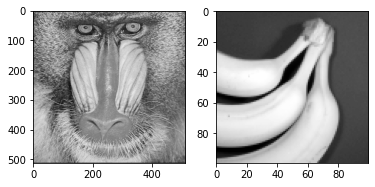

MSE:  4.580146789550781
PSNR:  41.52200963896719
SSIM:  0.9980424947378201
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


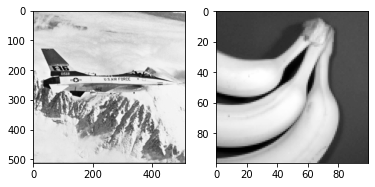

MSE:  0.6902809143066406
PSNR:  49.74054495194942
SSIM:  0.9958277752459844
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


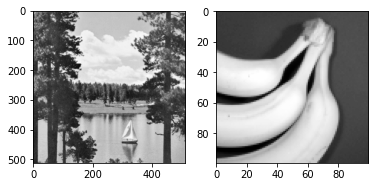

MSE:  1.8995857238769531
PSNR:  45.34421463837041
SSIM:  0.9963583517006221
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


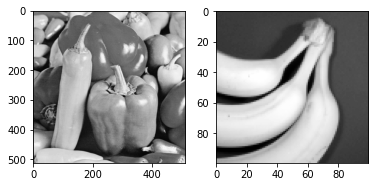

MSE:  1.4260063171386719
PSNR:  46.58958911444357
SSIM:  0.9952727750903079
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


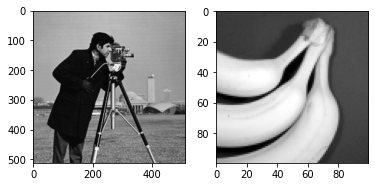

MSE:  0.6833953857421875
PSNR:  49.78408318733922
SSIM:  0.9967286725595241
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


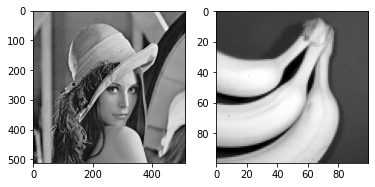

MSE:  0.776092529296875
PSNR:  49.23166857950656
SSIM:  0.9952019220180588
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


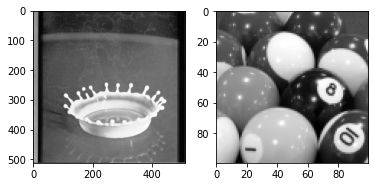

MSE:  0.7677764892578125
PSNR:  49.27845551786614
SSIM:  0.9953522875655102
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


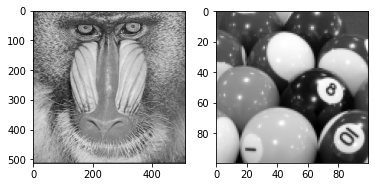

MSE:  4.351207733154297
PSNR:  41.74470543213201
SSIM:  0.9980911220031582
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


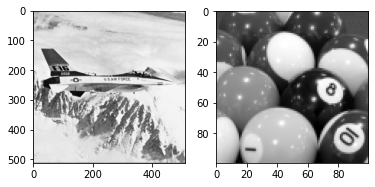

MSE:  0.68310546875
PSNR:  49.78592598679876
SSIM:  0.9957152864360359
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


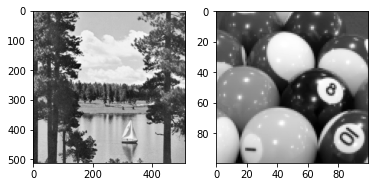

MSE:  1.8040390014648438
PSNR:  45.568344385611695
SSIM:  0.9964096982485022
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


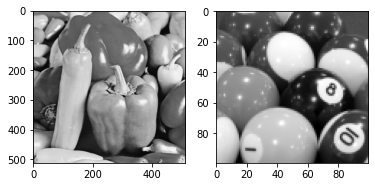

MSE:  1.4180984497070312
PSNR:  46.61373978624298
SSIM:  0.9952830505710043
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


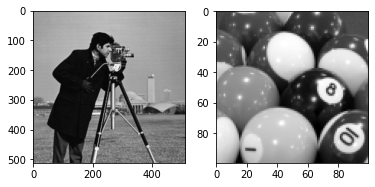

MSE:  0.5916938781738281
PSNR:  50.40983284896762
SSIM:  0.9968705037617411
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


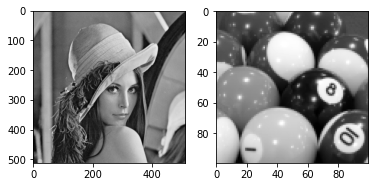

MSE:  0.7541427612304688
PSNR:  49.356267941150726
SSIM:  0.995158473542672
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


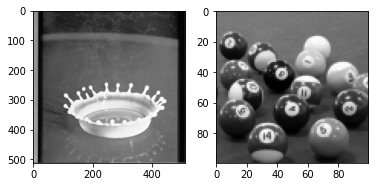

MSE:  0.7771415710449219
PSNR:  49.22580219900879
SSIM:  0.9952682336134079
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


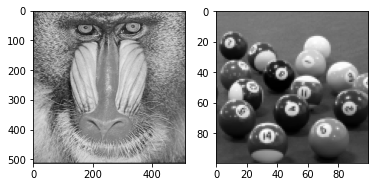

MSE:  4.542453765869141
PSNR:  41.55789845213671
SSIM:  0.9981126407093295
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


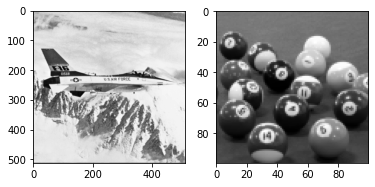

MSE:  0.8270149230957031
PSNR:  48.95567014604792
SSIM:  0.9956111089433208
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


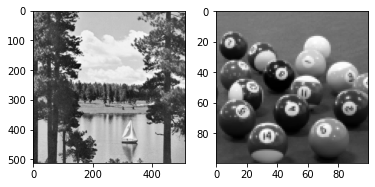

MSE:  1.8545494079589844
PSNR:  45.448419527971794
SSIM:  0.9963917887647445
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


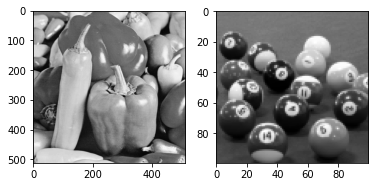

MSE:  1.34063720703125
PSNR:  46.857690925623075
SSIM:  0.9953019305126976
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


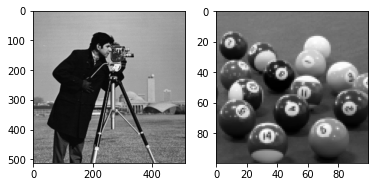

MSE:  0.5793418884277344
PSNR:  50.5014543023639
SSIM:  0.9968827787458965
-----------------------------------------------------
-------------------------------------------------
COVER IMAGE:                     MESSAGE IMAGE


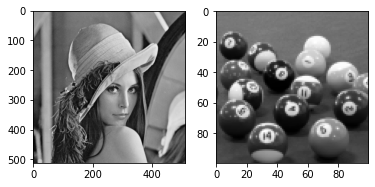

MSE:  0.7312507629394531
PSNR:  49.4901402866284
SSIM:  0.9951608084075625
-----------------------------------------------------


In [13]:
msg_files=['GRAY_8BIT_100x100/'+str(x)+'.png' for x in range(2,8)]
cover_files=['4.2.01.tiff','4.2.03.tiff','4.2.05.tiff','4.2.06.tiff','4.2.07.tiff','cameraman.jpg','Lenna.png']
mse_l,psnr_l,ssim_l=stegoPerformance(msg_files,cover_files)


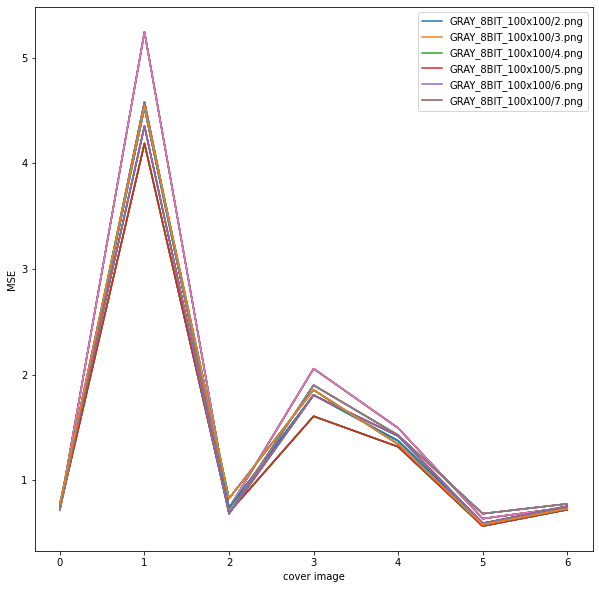

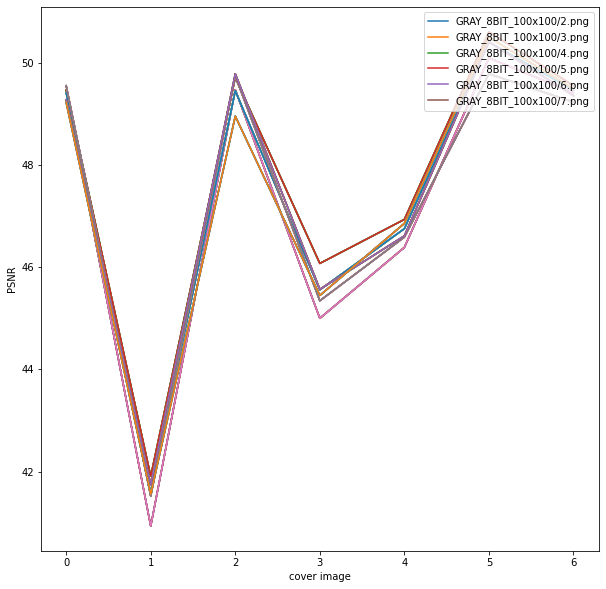

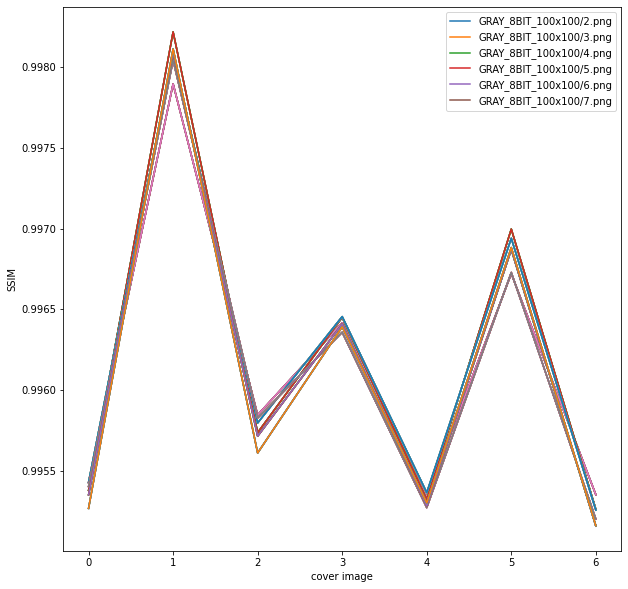

In [14]:
compPlot(msg_files,cover_files,mse_l,'cover image','MSE')
compPlot(msg_files,cover_files,psnr_l,'cover image','PSNR')
compPlot(msg_files,cover_files,ssim_l,'cover image','SSIM')